In [10]:
import numpy as np
import scipy.interpolate as inter
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.signal import savgol_filter

In [11]:
s1f1=np.loadtxt(open("FP_set2_trail1.csv", "rb"), delimiter=",")
s1f1[1]=savgol_filter(s1f1[1],5,3)*1000
splines1f1= inter.InterpolatedUnivariateSpline(s1f1[0],s1f1[1],k=5)

s1f2=np.loadtxt(open("FP_set2_trail2.csv", "rb"), delimiter=",",)
s1f2[1]=savgol_filter(s1f2[1],5,3)*1000
splines1f2= inter.InterpolatedUnivariateSpline(s1f2[0],s1f2[1],k=5)

s1f3=np.loadtxt(open("FP_set2_trail3.csv", "rb"), delimiter=",")
s1f3[1]=savgol_filter(s1f3[1],5,3)*1000
splines1f3= inter.InterpolatedUnivariateSpline(s1f3[0],s1f3[1],k=5)

Text(0.5, 1.0, 'Piezo Voltage vs Lock In')

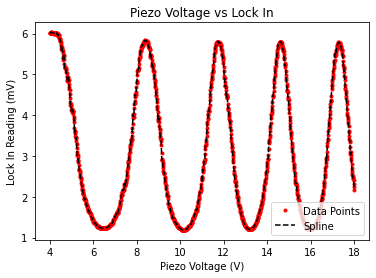

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s1f1[0],s1f1[1], 'r.', label="Data Points")
ax.plot(s1f1[0],splines1f1(s1f1[0]),'k--', label="Spline")
ax.set_xlabel("Piezo Voltage (V)")
ax.set_ylabel("Lock In Reading (mV)")
ax.legend(loc=4)
ax.set_title("Piezo Voltage vs Lock In")

Text(0.5, 1.0, 'Piezo Voltage vs Lock In')

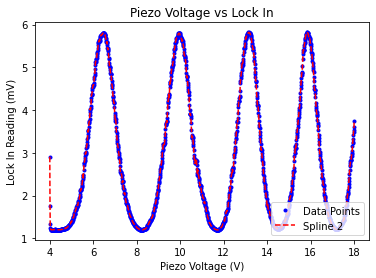

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s1f2[0],s1f2[1], 'b.', label="Data Points")
ax.plot(s1f2[0],splines1f2(s1f2[0]),'r--', label="Spline 2")
ax.set_xlabel("Piezo Voltage (V)")
ax.set_ylabel("Lock In Reading (mV)")
ax.legend(loc=4)
ax.set_title("Piezo Voltage vs Lock In")

Text(0.5, 1.0, 'Piezo Voltage vs Lock In')

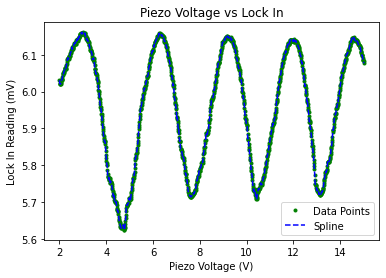

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s1f3[0],s1f3[1], 'g.', label="Data Points")
ax.plot(s1f3[0],splines1f3(s1f3[0]),'b--', label="Spline")


ax.set_xlabel("Piezo Voltage (V)")
ax.set_ylabel("Lock In Reading (mV)")
ax.legend(loc=4)
ax.set_title("Piezo Voltage vs Lock In")

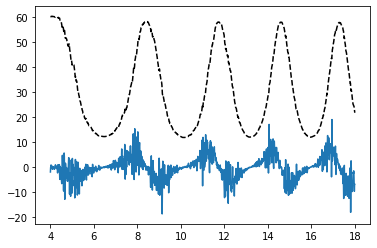

In [15]:
# Calculate x for max
firstdevs1f1=splines1f1.derivative(n=1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s1f1[0],10*splines1f1(s1f1[0]),'k--', label="Spline")
ax.plot(s1f1[0],firstdevs1f1(s1f1[0]), '', label="Data Points")

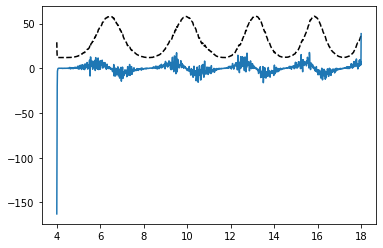

In [16]:
# Calculate x for max
firstdevs1f2=splines1f2.derivative(n=1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s1f2[0],10*splines1f2(s1f2[0]),'k--', label="Spline")
ax.plot(s1f2[0],firstdevs1f2(s1f2[0]), '', label="Data Points")

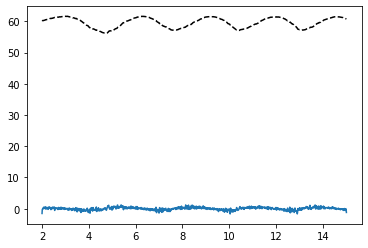

In [17]:
# Calculate x for max
firstdevs1f3=splines1f3.derivative(n=1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(s1f3[0],10*splines1f3(s1f3[0]),'k--', label="Spline")
ax.plot(s1f3[0],firstdevs1f3(s1f3[0]), '', label="Data Points")

In [38]:
firstpeakt1=opt.brentq(firstdevs1f1, 7.5, 8.5)
secondpeakt1=opt.brentq(firstdevs1f1, 11.5, 12)
thirdpeakt1= opt.brentq(firstdevs1f1, 14, 15)
fourthpeakt1= opt.brentq(firstdevs1f1, 17, 18)

print(f"Peaks for the first trail are: {firstpeakt1};{secondpeakt1};{thirdpeakt1};{fourthpeakt1}")

firstpeakt2=opt.brentq(firstdevs1f2, 6, 6.45)
secondpeakt2=opt.brentq(firstdevs1f2, 9.5, 10.2)
thirdpeakt2= opt.brentq(firstdevs1f2, 12.5, 13.5)
fourthpeakt2= opt.brentq(firstdevs1f2, 14.6, 16.2)

print(f"Peaks for the second trail are: {firstpeakt2};{secondpeakt2};{thirdpeakt2};{fourthpeakt2}")


firstpeakt3=opt.brentq(firstdevs1f3, 5.6, 6.45)
secondpeakt3=opt.brentq(firstdevs1f3, 8.5, 9.5)
thirdpeakt3= opt.brentq(firstdevs1f3, 11.6, 12.6)
fourthpeakt3= opt.brentq(firstdevs1f3, 14, 15)

print(f"Peaks for the second trail are: {firstpeakt3};{secondpeakt3};{thirdpeakt3};{fourthpeakt3}")

Peaks for the first trail are: 8.382209930191298;11.748196761414789;14.626402132877454;17.272204432533055
Peaks for the second trail are: 6.420379837499593;9.949616030189704;13.147350842084728;15.836896161734474
Peaks for the second trail are: 6.329062300651794;9.041775433619614;11.870180785897288;14.684675314091695


In [64]:
firstwhmt1= opt.brentq(lambda x: splines1f1(x) - splines1f1(firstpeakt1) / 2, 8.4, 9.4) - opt.brentq(lambda x: splines1f1(x) - splines1f1(firstpeakt1) / 2, 7, 7.9)
secondwhmt1= opt.brentq(lambda x: splines1f1(x) - splines1f1(secondpeakt1) / 2, 12, 13) - opt.brentq(lambda x: splines1f1(x) - splines1f1(secondpeakt1) / 2, 10.3, 11.6)
thirdwhmt1= opt.brentq(lambda x: splines1f1(x) - splines1f1(secondpeakt1) / 2, 17, 18) - opt.brentq(lambda x: splines1f1(x) - splines1f1(secondpeakt1) / 2, 16, 17)

firstwhmt2= opt.brentq(lambda x: splines1f2(x) - splines1f2(firstpeakt2) / 2, 6, 8) - opt.brentq(lambda x: splines1f2(x) - splines1f2(firstpeakt2) / 2, 5, 6)
secondwhmt2= opt.brentq(lambda x: splines1f2(x) - splines1f2(secondpeakt2) / 2, 9, 10) - opt.brentq(lambda x: splines1f2(x) - splines1f2(secondpeakt2) / 2, 7, 8)
thirdwhmt2= opt.brentq(lambda x: splines1f2(x) - splines1f2(secondpeakt2) / 2, 13, 14) - opt.brentq(lambda x: splines1f2(x) - splines1f2(secondpeakt2) / 2, 12, 13)

#firstwhmt3= opt.brentq(lambda x: splines1f3(x) - splines1f3(firstpeakt3) / 2, 6.5, 7.5)# - opt.brentq(lambda x: splines1f3(x) - splines1f3(firstpeakt3) / 2, 5, 6)
#secondwhmt3= opt.brentq(lambda x: splines1f3(x) - splines1f3(secondpeakt3) / 2, 9, 10) - opt.brentq(lambda x: splines1f3(x) - splines1f3(secondpeakt3) / 2, 8, 9)
#thirdwhmt3= opt.brentq(lambda x: splines1f3(x) - splines1f3(secondpeakt3) / 2, 12, 13) - opt.brentq(lambda x: splines1f3(x) - splines1f3(secondpeakt3) / 2, 10, 11.5)

In [65]:
print(firstwhmt1, secondwhmt1, thirdwhmt1)
print(firstwhmt2, secondwhmt2, thirdwhmt2)
#print(firstwhmt3, secondwhmt3, thirdwhmt3)

1.5138634580656722 1.318248802475475 1.1602644822476478
1.5707667522214965 1.970915050506183 1.2965890089893275


In [66]:
finess=np.array([(secondpeakt1 - firstpeakt1) / firstwhmt1, (thirdpeakt1 - secondpeakt1) / secondwhmt1, (fourthpeakt1 - thirdpeakt1) / thirdwhmt1,
                 (secondpeakt2 - firstpeakt2) / firstwhmt2, (thirdpeakt2 - secondpeakt2) / secondwhmt2, (fourthpeakt2 - thirdpeakt2) / thirdwhmt2,])
                # (secondpeakt3 - firstpeakt3) / firstwhmt3, (thirdpeakt3 - secondpeakt3) / secondwhmt3, (fourthpeakt3 - thirdpeakt3) / thirdwhmt3])
finess

array([2.2234415 , 2.1833552 , 2.28034413, 2.24682384, 1.62246202,
       2.07432371])

$$ Finess=F_i = \frac{\pi \sqrt{\frac{4R}{(1-R)^2}}}{2} $$


$$R=\frac{2 F_i^2 + π^2 - π \sqrt{4 F_i^2 + π^2}}{(2 F_i^2)} $$

In [67]:
r= lambda f_i: (2*f_i**2+np.pi**2-np.pi*np.sqrt(4*f_i**2+np.pi**2))/(2*f_i**2)

In [68]:
r(finess)

array([0.26822769, 0.2626214 , 0.27609704, 0.27147406, 0.17954084,
       0.24711895])

$$ Finess=F_i = \frac{\pi \sqrt{\frac{4R}{(1-R)^2}}}{2} $$


$$R=\frac{2 F_i^2 + π^2 - π \sqrt{4 F_i^2 + π^2}}{(2 F_i^2)} $$

In [69]:
r= lambda f_i: (2*f_i**2+np.pi**2-np.pi*np.sqrt(4*f_i**2+np.pi**2))/(2*f_i**2)

In [70]:
rset1=r(finess)

In [71]:
rset1

array([0.26822769, 0.2626214 , 0.27609704, 0.27147406, 0.17954084,
       0.24711895])